In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ('ignore')

In [2]:
#Import csv file for PCA analysis
mdf=pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D212/medical_clean.csv')

In [3]:
# Examine data info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
#Check for missing values
mdf.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [5]:
#Check for duplicate values
mdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
#Separate data and get quantitative data types only
mdf_num=mdf.select_dtypes('number')
mdf_num.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [7]:
#Get shape of numerical data
mdf_num.shape

(10000, 23)

In [8]:
#Drop non-continuous numeric variables
cont_variables=mdf_num.drop(['CaseOrder', 'Doc_visits', 'Population', 'Full_meals_eaten', 'vitD_supp', 'Zip', 'Children', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
cont_variables.columns

Index(['Lat', 'Lng', 'Age', 'Income', 'VitD_levels', 'Initial_days',
       'TotalCharge', 'Additional_charges'],
      dtype='object')

In [9]:
#Get shape of count_variables
cont_variables.shape

(10000, 8)

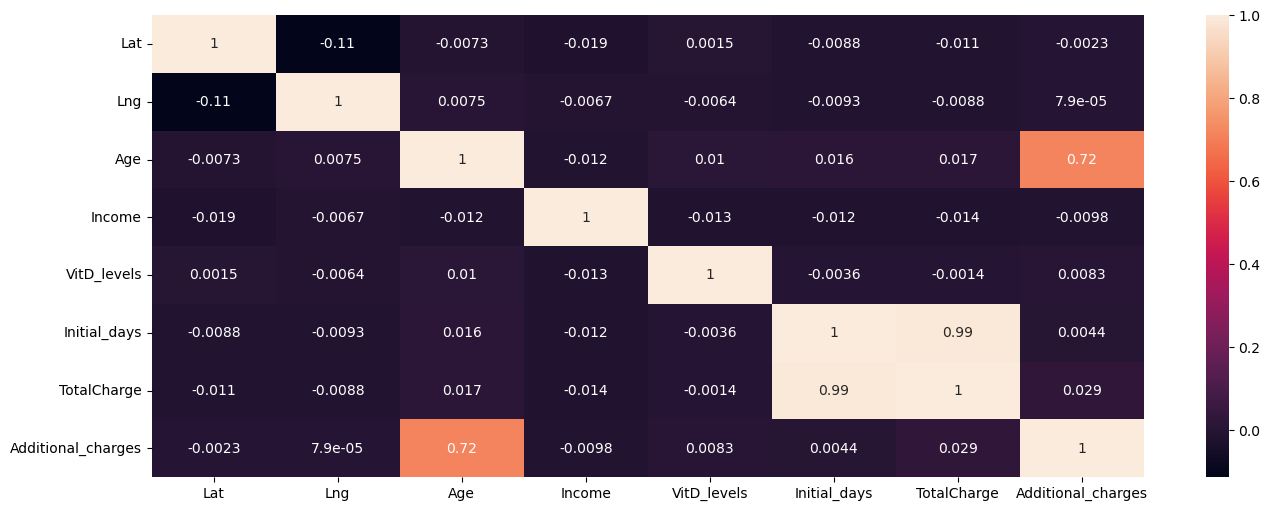

In [10]:
#Create correlation heatmap for numerical continuous variables
ax=plt.subplots(figsize=(16,6))
sns.heatmap(cont_variables.corr(), annot=True)
plt.show()

In [11]:
#Standardize the data using standard scaler
scaler=StandardScaler()
cont_std=pd.DataFrame(scaler.fit_transform(cont_variables))
cont_std

,0,1,2,3,4,5,6,7
0,-0.814668,0.297134,-0.024795,1.615914,0.583603,-0.907310,-0.727185,0.765005
1,-1.463305,0.395522,-0.121706,0.221443,0.483901,-0.734595,-0.513228,0.715114
2,0.886966,-0.354788,-0.024795,-0.915870,0.046227,-1.128292,-1.319983,0.698635
3,0.952530,-0.149403,1.186592,-0.026263,-0.687811,-1.244503,-1.460517,0.009004
4,-0.213252,0.943984,-1.526914,-1.377325,-0.260366,-1.261991,-1.467285,-1.408991
...,...,...,...,...,...,...,...,...
9995,-0.429820,0.855358,-1.381548,0.192047,-0.487525,0.650217,0.705765,-0.612461
9996,0.126784,1.076607,1.622691,-0.894380,0.105476,1.300475,1.114312,2.380307
9997,-0.441353,0.259332,-0.412438,0.891569,-0.414049,1.356958,1.359597,0.358695
9998,0.990676,-0.708494,-0.509349,-0.378271,0.964820,1.098585,1.069727,-0.787624


In [12]:
#Create an pca instance
pca=PCA()
pc= pca.fit_transform(cont_std)
pc_df= pd.DataFrame(pc, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.109593,0.651893,-0.880131,0.737566,1.525935,0.091127,-0.566029,0.098145
1,-0.814662,0.546376,-1.292409,-0.228375,0.583492,0.708165,-0.606740,0.123933
2,-1.649047,0.689401,0.969270,-0.636872,-0.635084,-0.192318,-0.501399,-0.161873
3,-1.804637,1.048508,0.744546,0.479089,-0.619186,-0.492171,0.844706,-0.119483
4,-2.145703,-1.792673,-0.724168,-1.034678,-1.215172,-0.219533,-0.087901,-0.135660
...,...,...,...,...,...,...,...,...
9995,0.773657,-1.515386,-0.959924,0.314325,-0.277746,-0.313721,-0.551542,0.025645
9996,2.043313,2.628520,-0.545463,-0.766477,-0.627316,-0.731947,-0.536649,-0.177726
9997,1.886872,-0.289870,-0.595204,0.903734,0.320697,-0.035317,-0.545108,-0.020843
9998,1.410539,-1.087100,1.274091,-0.829783,0.466517,-0.214954,0.203083,-0.004829


In [13]:
#Create loadings matrix
loadings=pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=cont_variables.columns).T
loadings

,Lat,Lng,Age,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
PC1,-0.013079,-0.010528,0.085809,-0.020516,-0.001636,0.701050,0.702184,0.086013
PC2,-0.008216,0.010934,0.701541,-0.018690,0.019146,-0.091424,-0.080868,0.701455
PC3,0.707443,-0.698601,0.002471,-0.087846,0.059987,-0.000290,-0.001272,0.012542
PC4,0.010501,-0.137959,0.017929,0.725834,-0.673096,0.007525,0.005167,0.023631
PC5,-0.093762,-0.114966,-0.000156,0.661202,0.735289,0.008485,0.009042,0.000546
PC6,-0.700262,-0.692410,-0.003099,-0.165777,-0.048152,-0.014659,-0.013262,-0.000853
PC7,0.003858,-0.006681,0.706716,0.002308,-0.001932,0.031677,-0.031469,-0.706038
PC8,0.001483,-0.000357,0.026313,0.001312,-0.001552,-0.706274,0.706486,-0.036819


In [14]:
#Arrange components begining with 1 
pcomp=np.arange(pca.n_components_) +1
pcomp

array([1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
#Observe explained ratio variance
exp_var= pca.explained_variance_ratio_
exp_var

array([0.24905583, 0.21418876, 0.13917904, 0.12653693, 0.12361996,
       0.11050075, 0.03545408, 0.00146465])

In [22]:
#Calculate cumulative sum of variance ratios
cum_sum=np.cumsum(pca.explained_variance_ratio_)
print(cum_sum)

[0.24905583 0.46324459 0.60242364 0.72896056 0.85258052 0.96308127
 0.99853535 1.        ]


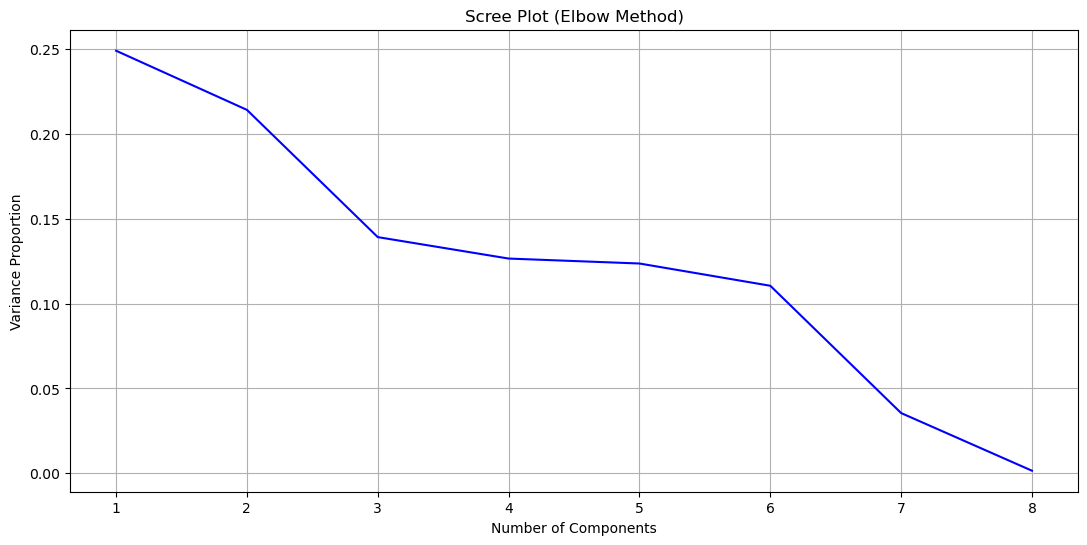

In [17]:
#Construct Elbow plot to confirm optimal number of components
plt.figure(figsize=(13,6))
plt.plot(pcomp, exp_var, 'b-')
plt.title('Scree Plot (Elbow Method)')
plt.xlabel('Number of Components')
plt.ylabel('Variance Proportion')
plt.grid()
plt.show()


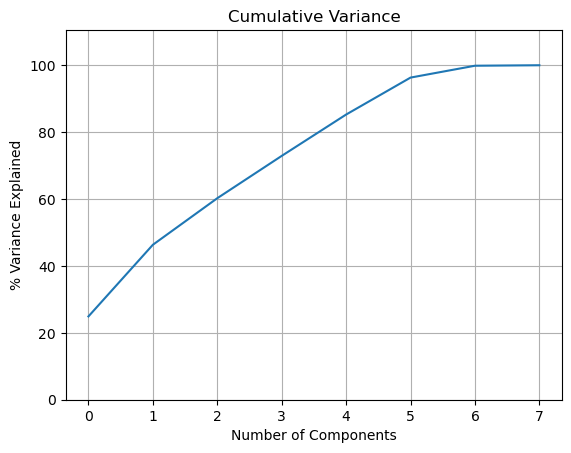

In [26]:
#Visualize total variance captured by components
var=cum_sum*100
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Components')
plt.title('Cumulative Variance')
plt.grid()
plt.ylim(0, 110.5)
plt.plot(var)

In [18]:
cont_std.to_csv('/Users/robertpatton/Desktop/D212_std.csv')